# 3. Vehicle Accident Analysis
## Johan Mendez Macea
## Requerimientos
* ## Pandas
* ## Sodapy
* ## Numpy
* ## MatplotLib - Pyplot
* ## datetime

# Version usada de Python 3.8

# Recursos Dataset
[https://dev.socrata.com/foundry/www.datos.gov.co/yb9r-2dsi](https://dev.socrata.com/foundry/www.datos.gov.co/yb9r-2dsi)


In [114]:

!pip3 install matplotlib;
!pip3 install pandas;
!pip3 install Numpy;
!pip3 install sodapy;
!pip3 install datetime;
!pip3 install scipy;

In [116]:
import pandas as pd
import numpy as np
from sodapy import Socrata
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm

In [117]:
client = Socrata("www.datos.gov.co", None)
accidentes=pd.DataFrame(client.get_all("yb9r-2dsi"))
d=[datetime.fromisoformat(x) for x in accidentes['fecha_accidente'].astype(str).values]
accidentes['fecha_accidente']=d
accidentes

,fecha_accidente,a_o_accidente,mes_accidente,dia_accidente,hora_accidente,gravedad_accidente,clase_accidente,sitio_exacto_accidente,cant_heridos_en_sitio_accidente,cantidad_accidentes,cant_muertos_en_sitio_accidente
0,2015-01-01,2015,1,Jue,02:10:00:PM,Con heridos,Choque,VIA 40 CON 77,1,1,NaN
1,2015-01-01,2015,1,Jue,02:15:00:PM,Solo daños,Choque,CALLE 14 CR 13,NaN,1,NaN
2,2015-01-01,2015,1,Jue,02:20:00:PM,Solo daños,Choque,CL 74 CR 38C,NaN,1,NaN
3,2015-01-01,2015,1,Jue,03:30:00:PM,Con heridos,Choque,CL 45 CR 19,2,1,NaN
4,2015-01-01,2015,1,Jue,04:20:00:AM,Solo daños,Choque,CRA 15 CLLE 21,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
36344,2021-07-30,2021,7,Vie,04:30:00:PM,Solo daños,Choque,CL 90 CR 59B,NaN,1,0
36345,2021-07-30,2021,7,Vie,04:50:00:PM,Solo daños,Choque,CL 38 CR 39 - 33,NaN,1,0
36346,2021-07-30,2021,7,Vie,06:30:00:PM,Solo daños,Choque,CR 53 CL 99,NaN,1,0
36347,2021-07-30,2021,7,Vie,07:30:00:PM,Solo daños,Choque,CL 47 CR 19,NaN,1,0


Text(0.5, 1.0, 'Grafica Valores Observados')

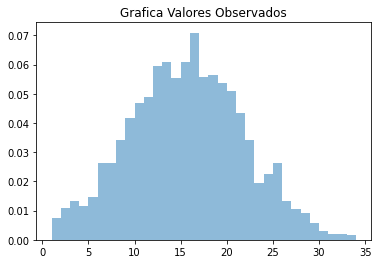

In [120]:
unicos=accidentes['fecha_accidente'].value_counts().to_frame('Contador')

fg,ax=plt.subplots(1)
ax.hist(unicos,bins=33,density=True,alpha=0.5)
ax.set_title('Grafica Valores Observados')

# Valor observado
## A partir de esta grafica se espera que la distribución de probabilidad(Grafica con valores esperados) tome valores **tales que encajen en esta forma con los cuales podremos demostrar que la distribución es capaz de predecir las probabilidades reales**.
<hr>

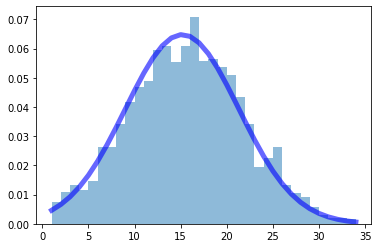

In [119]:
mu=unicos.describe().iloc[1,0]
sig=unicos.describe().iloc[2,0]
fg,ax=plt.subplots(1)
ax.hist(unicos,bins=33,density=True,alpha=0.5)
ax.plot(unicos.values, norm.pdf(unicos.values, mu, sig), 'b-', lw=5, alpha=0.6, label='norm')

# Valores esperados vs Valores Observados
## Podemos ver que **la distribución normal cubre casi a la perfección los casos de accidentes** acercandose lo mas posible al modelo de predicción de probabilidad


<hr>